In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
user_engagement = pd.read_csv('takehome_user_engagement.csv')
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
cols = ['object_id', 'creation_source', 'creation_time', 
        'last_session_creation_time', 'opted_in_to_mailing_list',
        'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']
users = pd.read_csv('takehome_users.csv', usecols=cols, encoding='ISO-8859-1')
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


# Engagement:

In [4]:
unique_users = user_engagement['user_id'].nunique()
total_logins = len(user_engagement)

message = f"There were {unique_users} users and {total_logins} total logins."
print(message)


There were 8823 users and 207917 total logins.


In [5]:
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'], format='%Y-%m-%d %H:%M:%S')

In [6]:
def logins_in_days(df, days=7, logins=3):
    from datetime import timedelta
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    
    passed_days = df['date'].diff(periods=logins-1)

    return any(passed_days <= timedelta(days=days))

In [7]:
adopted_user = user_engagement.groupby('user_id').apply(logins_in_days)
adopted_user.name = 'adopted_user'

In [8]:
num_adopted_users = sum(adopted_user)
total_users = len(adopted_user)

print(f"There were {num_adopted_users} adopted users out of {total_users} users.")


There were 1656 adopted users out of 8823 users.


# Users

In [9]:
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [10]:
users['org_id'].value_counts().head()

0    319
1    233
2    201
3    168
4    159
Name: org_id, dtype: int64

In [11]:
users['invited_by_user_id'].value_counts().head()

10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
Name: invited_by_user_id, dtype: int64

In [12]:
users = users.drop(['org_id', 'invited_by_user_id'], axis=1)

In [13]:
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0


In [14]:
users['creation_time'] = pd.to_datetime(users['creation_time'], format='%Y-%m-%d %H:%M:%S')
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')


In [15]:
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0


In [16]:
users['user_history'] = users['last_session_creation_time'] - users['creation_time']
users['user_history'] = users['user_history'].dt.days

In [17]:
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,user_history
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,0.0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,136.0
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,0.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,5.0


In [18]:
latest_date = max(users['creation_time'])
users['age_of_account'] = latest_date - users['creation_time']
users['age_of_account'] = users['age_of_account'].dt.days

In [19]:
users.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,user_history,age_of_account
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,0.0,38
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,136.0,196
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,0.0,437
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1.0,374
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,5.0,498


In [20]:
users = users.drop(['creation_time', 'last_session_creation_time'], axis=1)

In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_source             12000 non-null  object 
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   user_history                8823 non-null   float64
 5   age_of_account              12000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 562.6+ KB


In [22]:
users = users.set_index('object_id')
users.index.name = 'user_id'
data = pd.concat([users, adopted_user], axis=1, join='inner')
data['adopted_user'] = data['adopted_user'].astype(int)

In [23]:
users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,user_history,age_of_account
user_id,,,,,
1,GUEST_INVITE,1,0,0.0,38
2,ORG_INVITE,0,0,136.0,196
3,ORG_INVITE,0,0,0.0,437
4,GUEST_INVITE,0,0,1.0,374
5,GUEST_INVITE,0,0,5.0,498


In [24]:
data.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,user_history,age_of_account,adopted_user
user_id,,,,,,
1,GUEST_INVITE,1,0,0.0,38,0
2,ORG_INVITE,0,0,136.0,196,1
3,ORG_INVITE,0,0,0.0,437,0
4,GUEST_INVITE,0,0,1.0,374,0
5,GUEST_INVITE,0,0,5.0,498,0


# EDA

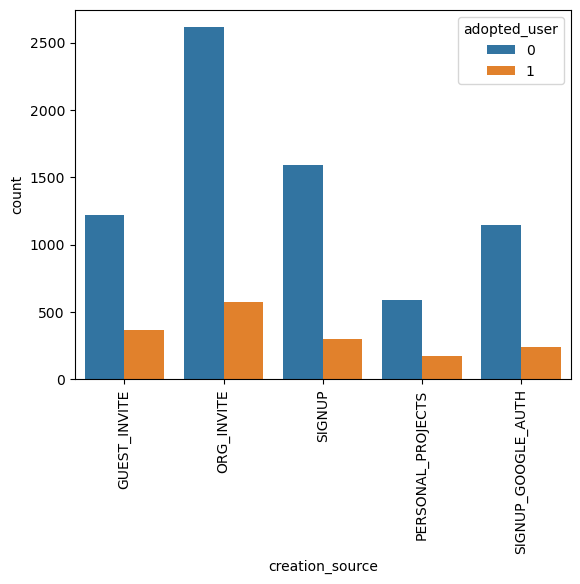

In [25]:
import seaborn as sns
_ = sns.countplot(x='creation_source', data=data, hue='adopted_user')
_ = plt.xticks(rotation=90)

In [26]:
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(data['creation_source'], data['adopted_user'])
results = chi2_contingency(crosstab)
print(f'chi2 = {results[0]}\tp = {results[1]}')

chi2 = 41.27933208242451	p = 2.3526508745340972e-08


In [27]:
data.groupby('creation_source')['adopted_user'].apply(lambda x: sum(x)/len(x))


creation_source
GUEST_INVITE          0.232368
ORG_INVITE            0.180050
PERSONAL_PROJECTS     0.225131
SIGNUP                0.159115
SIGNUP_GOOGLE_AUTH    0.172563
Name: adopted_user, dtype: float64

In [28]:
data.groupby('opted_in_to_mailing_list')['adopted_user'].apply(lambda x: sum(x)/len(x))

opted_in_to_mailing_list
0    0.185994
1    0.192722
Name: adopted_user, dtype: float64

In [29]:
from scipy.stats import ttest_ind

def z_test(df, col, target='adopted_user'):
    opted_in = df.loc[df[col] == 1, target]
    opted_out = df.loc[df[col] == 0, target]
    t, p = ttest_ind(opted_in, opted_out)
    print(f'For {col}, t = {t}, p = {p}')
    
z_test(data, 'opted_in_to_mailing_list')


For opted_in_to_mailing_list, t = 0.702977912814822, p = 0.48208806606711385


In [30]:
data.groupby('enabled_for_marketing_drip')['adopted_user'].apply(lambda x: sum(x)/len(x))


enabled_for_marketing_drip
0    0.186982
1    0.191648
Name: adopted_user, dtype: float64

In [31]:
z_test(data, 'enabled_for_marketing_drip')


For enabled_for_marketing_drip, t = 0.40292649500940364, p = 0.6870120643231132


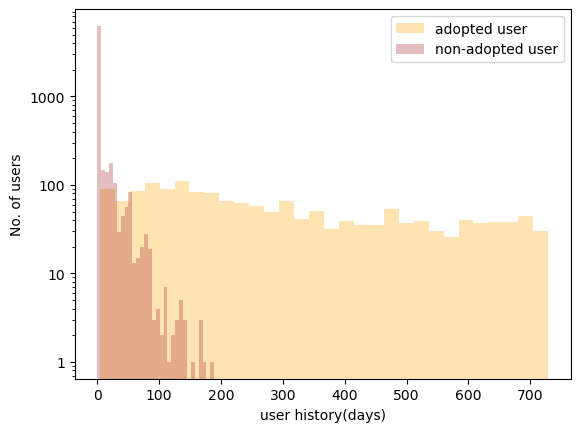

In [32]:
# history and adopted user
def plot_hist(df, col, xlabel):
    _ = plt.hist(df.loc[data['adopted_user']==1, col], 
                 bins=30, alpha=0.3, color='orange', label='adopted user')
    _ = plt.hist(df.loc[data['adopted_user']==0, col], 
                 bins=30, alpha=0.3, color='brown', label='non-adopted user')
    _ = plt.yscale('log')
    _ = plt.legend()
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('No. of users')
    _ = plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])
plot_hist(data, 'user_history', 'user history(days)')

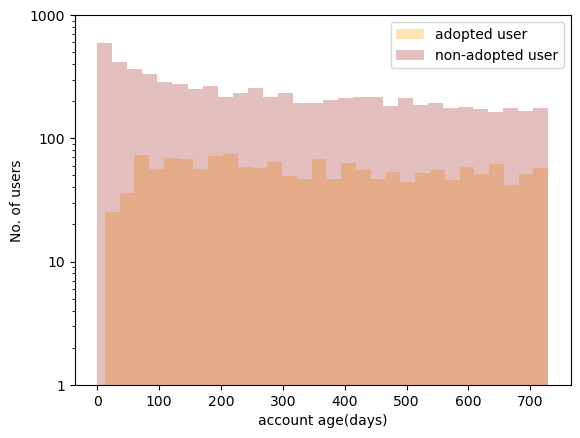

In [33]:
plot_hist(data,'age_of_account', 'account age(days)')

# Model

In [34]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [35]:
creation_source = pd.get_dummies(data['creation_source'], drop_first=True)
model_data = pd.concat([data, creation_source], axis=1).drop('creation_source', axis=1)
y = model_data['adopted_user']
X = model_data.drop('adopted_user', axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, stratify=y, random_state=42)

In [36]:
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
params = {'n_estimators': [10, 50, 100, 200]}
model = GridSearchCV(clf, params)
model.fit(Xtrain, ytrain)
print('Best parameters were', model.best_params_)
print('Best average precision was', model.best_score_)

Best parameters were {'n_estimators': 100}
Best average precision was 0.9623700369708137


In [37]:
model = RandomForestClassifier(
    random_state=42, class_weight='balanced', n_estimators=100
)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Accuracy of test set was', accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Accuracy of test set was 0.9524025385312783
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1792
           1       0.88      0.86      0.87       414

    accuracy                           0.95      2206
   macro avg       0.92      0.92      0.92      2206
weighted avg       0.95      0.95      0.95      2206



In [40]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)
print(importance)

user_history                  0.895648
age_of_account                0.088648
opted_in_to_mailing_list      0.003301
SIGNUP                        0.003050
enabled_for_marketing_drip    0.002900
ORG_INVITE                    0.002355
PERSONAL_PROJECTS             0.002157
SIGNUP_GOOGLE_AUTH            0.001942
dtype: float64


The history of the user is the most important feature. I recommend growing adopted users that would encourage existing users to log in and use the software. If we add up the way how users sign up that would be the next feature to look at, invitations and personal projects have the highest adoption rate which would engourage users to invite otehrs. Mailing list and marketing drip is no